<!--NOTEBOOK_HEADER-->*This notebook contains material for CBE 20258 Numerical and Statistical Analysis taught at the University of Notre Dame. (c) Professors Alexander Dowling, Ryan McClarren, and Yamil Colón. This collection of notebooks [cbe-xx258](https://ndcbe.github.io/cbe-xx258) is available [on Github](https://github.com/ndcbe/cbe-xx258).*


<!--NAVIGATION-->
< [1.2 Learning Python Basics](https://ndcbe.github.io/cbe-xx258/01.02-Variables.html) | [Contents](toc.html) | [1.4 Functions, Scoping, and Other Fun Stuff](https://ndcbe.github.io/cbe-xx258/01.04-Functions-scoping.html) ><p><a href="https://colab.research.google.com/github/ndcbe/cbe-xx258/blob/master/docs/01.03-Flow-control.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe-xx258/01.03-Flow-control.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 1.3 Flow Control and Pseudocode

**Reference**: Chapter 2 of *Computational Nuclear Engineering and Radiological Science Using Python*, R. McClarren (2018)

## 1.3.1 Learning Objectives

After studying this notebook, completing the activities, and asking questions in class, you should be able to:

## 1.3.2 If Statements

Sometimes you want to execute code differently based on the value of a certain variable.  This is most commonly done in if - else constructs.  Here's an example

In [37]:
instructors_opinion = input("What is your opinion of student? ") #'Not annoying'
grade = ''
if (instructors_opinion == 'annoying'):
    grade = 'F+'
elif (instructors_opinion == 'Not annoying'):
    grade = 'B+'
else:
    grade = 'A'
print(grade)

What is your opinion of student? 
A


What this codes says is that if the value of <tt>instructors_opinion</tt> is "annoying", the grade will be "F+", else if (<tt>elif</tt> in python-speak) <tt>instructors_opinion</tt> is "Not annoying" the grade will be "B+", and anything else will be a grade of "A".  In the example I typed in "Not Annoying" and the if statement and the elif statement require that the string exactly match, so it executed the <tt>else</tt> part of the code. (Note: This example came from the textbook. Prof. Dowling uses an objective grading scale in this class!)



It is important to remember that when you want to check equality between two things you need to use <tt>==</tt> and **not a single equals sign**.  A single equals sign is what you use when you want to assign something to a variable.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Rerun the code above. Find input values that cause the program to output "F+", "B+", and "A".
</div>

**Answer to home activity**. Give the input that results in the following output:

Output: F+. Input: annoying

Output B+. Input: Not annoying

Output A. Input: 


In [38]:
import math
pi_approx = 22/7
if math.fabs(pi_approx - math.pi) < 1.0e-6:
    print("Yes, that is a good approximation")
else:
    print("No,",pi_approx, "is not a good approximation of", math.pi,".")

No, 3.142857142857143 is not a good approximation of 3.141592653589793 .


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Create a small Python program that asks for the student's weighted final grade (input) and them prints the letter grade per the scale in the class syllabus (output).
</div>

In [39]:
score = input("Score") #Final grade
grade = ''
if (score >='90'):
    grade = 'A'
elif ('90'>score>='80'):
    grade = 'B'
elif ('80'>score>='70'):
    grade = 'C'
elif ('70'>score>='600'):
    grade = 'D'
else:
    grade = 'F'
print('Your final grade is',grade)

Score
Your final grade is F


Branching statements are most powerful when combined with iteration, as we will now explore.

## 1.3.3 Iteration with While Loops

Iteration executes a piece of code repeatedly, based on some criteria. In this example we will try to find a good approximation to pi.

In [40]:
#this code finds a decent approximation to pi
import math 
converged = 0
guess = 3.141
iteration = 0
eps = 1.0e-6 #this is my tolerance for approximating pi
converged = math.fabs(guess - math.pi) < eps #0 if false, 1 if true
while (converged == 0):
    guess = guess + eps/2
    converged = math.fabs(guess - math.pi) < eps
    iteration += 1 #same as iteration = iteration + 1
print("Our approximation of pi is", guess)
print("It took us", iteration,"guesses to approximate pi")

Our approximation of pi is 3.1415920000000828
It took us 1184 guesses to approximate pi


In this code, as long as <tt>converged == 0</tt> the code in the while block (the indented code below <tt>while (converged == 0):</tt>) will execute over and over.  When the value of our guess is within $10^{-6}$ to $\pi$ in absolute value, converged will become 1 and the while loop will stop at the bottom of the code block.

I did something tricky, but useful in this example.  In python when a conditional expression like <tt>a > b</tt> is true it evaulates to an integer of 1, and evaluates to an integer of 0 when false.  We will make use of this trick later on and it is good to see it now to help you get accustomed to it.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Copy the pi estimation code to below. Then set the convergence tolerance to 1E-8. How many times more iterations does to take to acheive two addition digits of precision?
</div>

In [41]:
# Copy code to here#this code finds a decent approximation to pi
import math
converged = 0
guess = 3.141
iteration = 0
eps = 1.0e-8 #this is my tolerance for approximating pi
converged = math.fabs(guess - math.pi) < eps #0 if false, 1 if true
while (converged == 0):
    guess = guess + eps/2
    converged = math.fabs(guess - math.pi) < eps
    iteration += 1 #same as iteration = iteration + 1
print("Our approximation of pi is", guess)
print("It took us", iteration,"guesses to approximate pi")

Our approximation of pi is 3.1415926449963982
It took us 118529 guesses to approximate pi


## 1.3.4 For Loops

**While loops** are great and all we really need for iteration. But they are cumbersome if we want to execute a block of code a set number of times. We have to define a counting variable and increment it by hand:

In [42]:
#Some code that counts to ten
count = 1
while (count <= 10):
    print(count)
    count=count+1 #we can also write  count += 1

1
2
3
4
5
6
7
8
9
10


The **for loop** is built for such a situation.

We will typically specify `for` loops with the `range` function. Range takes 3 input parameters: `range(start, stop[, step])`.
* start parameter: number, self explanatory.
* stop parameter: the range function goes to this number before stopping.
* step parameter: in brackets because it is optional. If you don't define it assumes you want to count by 1 (i.e., step by 1). m

In [43]:
#the list command tells python to explicitly write out the range
print(list(range(1,10))) 

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Also, if you just give range one parameter, it treats that as stop and assumes you want to start at 0:

In [44]:
#These should be the same
print(list(range(0,10)))
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [45]:
#Here's something using the step
print(list(range(0,10,2)))

[0, 2, 4, 6, 8]


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Print a list of odd numbers that starts at 1 and stops before reaching 9.
</div>

In [46]:
print(list(range(1,9,2)))

[1, 3, 5, 7]


With the range command we can have a for loop assign a variable a value in the range, in order, each time the code block of the for loop executes:

In [47]:
for i in range(10):
    print(i+1)

1
2
3
4
5
6
7
8
9
10


In [48]:
#for loop count from 10 to 0
for i in range(10,-1,-1):
    print(i)

10
9
8
7
6
5
4
3
2
1
0


In [49]:
#for loop count from 0 to 10
for i in range(11):
    # but prints numbers from 10 to 0
    print(10-i)

10
9
8
7
6
5
4
3
2
1
0


Let's say we want to add a number to itself 7 times. We could use a for loop:

In [50]:
# for loop version
number = 10
sum = 0
for i in range(7):
    sum += number
print(sum)

70


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write a while loop that does the same thing: add a number (10) to itself 7 times.
</div>

You can always write a while loop that does the same thing as a for loop. But often we prefer a for loop because the syntax is easier to write, understand, and debug.

## 1.3.5 Pseudocode

Pseudocode is a high-level planning tool for writing a computer program. The main idea is to capture the essential steps, i.e., all of the logic, without worrying about syntax. In this class, complete pseudocode must:
* Show all of the logical steps
* Include enough comments so anyone can read and follow the steps
* Indentend to show blocks (e.g., what is inside a for loop)

We will practice writing pseudocode starting in Lecture 1. It is easy to pick-up after a few examples.

**Why is it important to write pseudocode?** Experienced programmers use pseudocode to divide creating a computer program into two main steps:
1. Determining the correct logic
2. Determining the correct syntax

Many experienced programmers will tell you that step 1 -- determining the correct logic -- is by far the most important and difficult step. A common mistake of novice programmers is to rush through step 1. In previous semesters, almost all students that self-reported spending **more than 10 hours on assignments** skipped writing pseudocode. They instead focused on finding the current Python syntax, which was often a wasted effort because their logic was wrong! You will write a lot of pseudocode in this class: during class, in tutorial, for every assignment, and on exams. By requiring pseudocode, we seek to reenforce good programming habits, help you more systematically approach computer programming, and ultimately spend less on class assignments.


**But I am a good computer programmer... Why cannot pseudocode be optional?** We, Prof. Dowling and Prof. Colón, have been writing Python programs for almost 20 years. We still write pseudocode, because it is such an important programming skill. You'll see pseudocode on our office whiteboards. If you are a novice programmer, writing pseudocode will help you tramendously in this class. Moreover, interviews for progamming-intensive jobs often involve writing pseudocode. The interviewer will hand you a whiteboard marker and ask you to work out the logic for an algorithm in real-time while asking you questions. Writing pseudocode in this class will help you ace that job interview. (Plus, if you are a programming wiz, writing pseudocode will only take a few minutes for assignments.)

## 1.3.6 Estimate $\pi$ by throwing darts

Here is, perhaps, a more practical use of a for loop: to compute $\pi$. The main idea is to throw darts at a square board and count the number of darts that land in an inscribed circle. We can do this on the computer by representing each dart as two numbers, x and y coordinates, each of which is generated $-1$ and $1$ from a uniform probability distribution (equal chance of selecting any number). Recall, we learned about how to generate random numbers.

### 1.3.6.1 Governing Formula

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>:  Write the formulas the calculate the area of i) a circle with radius 1 and ii) a square with edge length 2. How can we use the ratio of these areas to estimate pi? How is the ratio of these areas related to the number of darts that land in the box?
</div>

### 1.3.6.2 Pseudocode

TODO: Record video and embed here

#### 1.3.6.2.1 Python Implementation

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, spend 5 minutes writing pseudocode. If you finish early, jump ahead to implementing in Python.
</div>

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: After agreeing on the pseudocode as a class, implement the logic in Python. This step is much easier because we have a plan for the logic. We just need to decide on the correct syntax.</div>

#### 1.3.6.2.2 Python

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Implement the pseudocode in Python.
</div>

In [51]:
# estimating pi by throwing virtual darts
import random
# YOUR SOLUTION HERE

### Note: You need to finish this for the rest of the code to work.

This is our first example of a **Monte Carlo method** and we will return to these methods at the end of the course.

### 1.3.6.3 Using Help to Learn More About a Function

If you look in the solution in the reference textbook, you'll see the `random.seed` command. Let's learn more about what it does.


In [52]:
import random
help(random.seed)

Help on method seed in module random:

seed(a=None, version=2) method of random.Random instance
    Initialize internal state from hashable object.
    
    None or no argument seeds from current time or from an operating
    system specific randomness source if available.
    
    If *a* is an int, all bits are used.
    
    For version 2 (the default), all of the bits are used if *a* is a str,
    bytes, or bytearray.  For version 1 (provided for reproducing random
    sequences from older versions of Python), the algorithm for str and
    bytes generates a narrower range of seeds.



### 1.3.6.4 Another Solution Approach - With Plots

Using numpy, which we haven't covered yet, we can do this in an even fancier way. If we use matplotlib, another python library, we can get nice graphs as well.

1000 darts were thrown, and
788 darts landed inside the circle


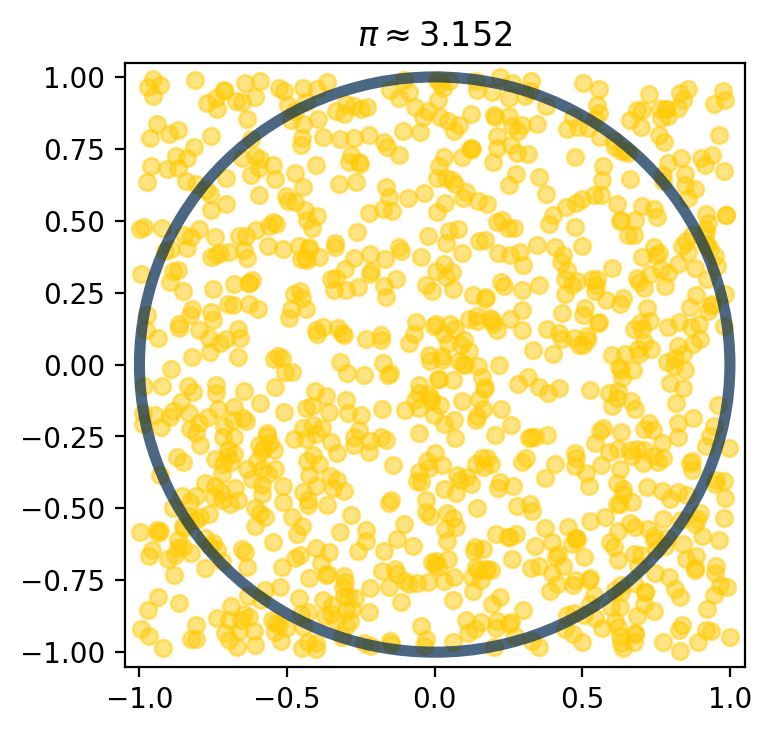

In [53]:
import numpy as np
import matplotlib.pyplot as plt
#this line is only needed in iPython notebooks
%matplotlib inline 

#pick our points
number_of_points = 10**3
x = np.random.uniform(-1,1,number_of_points)
y = np.random.uniform(-1,1,number_of_points)
#compute pi
n_inside = np.sum(x**2 + y**2 <= 1)
print(str(number_of_points) + " darts were thrown, and")
print(str(n_inside) + " darts landed inside the circle")

pi_approx = 4.0*n_inside/number_of_points
#now make a scatter plot
maize = "#ffcb05"
blue = "#00274c"
fig = plt.figure(figsize=(4,4), dpi=200)
plt.scatter(x, y, alpha=0.5, color=maize) #scatter plot with hex color
#draw a circle of radius 1 with center (0,0)
circle = plt.Circle((0,0),1,color=blue, 
                    alpha=0.7, fill=False, linewidth=4)
#add the circle to the plot
plt.gca().add_patch(circle)
#make sure that the axes are square so that our circle is circular
plt.axis([-1,1,-1,1])
#set axes bounds: axis([min x, max x, min y, max y])
plt.axis([-1.05,1.05,-1.05,1.05])
#make the title have the approximation to pi
plt.title("$\\pi \\approx $" + str(pi_approx))
plt.show()

Do the same with Irish Green (see https://onmessage.nd.edu/athletics-branding/colors/): 

1000 darts were thrown, and
795 darts landed inside the circle


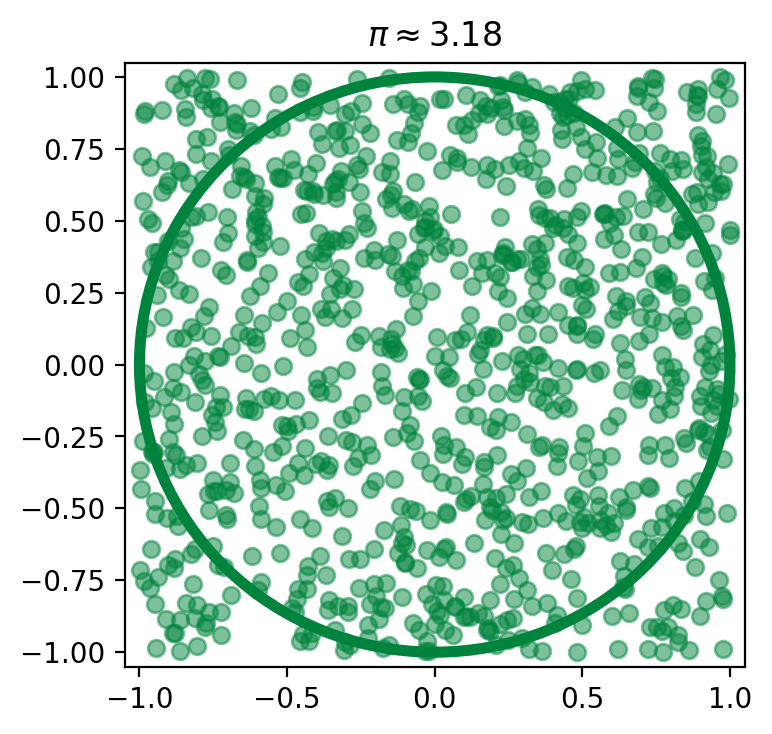

In [54]:
import numpy as np
import matplotlib.pyplot as plt
#this line is only needed in iPython notebooks
%matplotlib inline 

#pick our points
number_of_points = 10**3
x = np.random.uniform(-1,1,number_of_points)
y = np.random.uniform(-1,1,number_of_points)
#compute pi
n_inside = np.sum(x**2 + y**2 <= 1)
print(str(number_of_points) + " darts were thrown, and")
print(str(n_inside) + " darts landed inside the circle")
pi_approx = 4.0*n_inside/number_of_points
#now make a scatter plot
green = "#00843D"
fig = plt.figure(figsize=(4,4), dpi=200)
#scatter plot with hex color
plt.scatter(x, y, alpha=0.5, color=green) #draw a circle of radius 1 with center (0,0)
circle = plt.Circle((0,0),1,color=green, alpha=1, fill=False, linewidth=4)
#add the circle to the plot
plt.gca().add_patch(circle)
#set axes bounds: axis([min x, max x, min y, max y])

plt.axis([-1.05,1.05,-1.05,1.05])
#make the title have the approximation to pi
plt.title("$\\pi \\approx $" + str(pi_approx))
plt.show()

Notice how even with the same number of points we get **different answers because we are using random numbers**.

## 1.3.7 TODO: Add another pseudocode example

<!--NAVIGATION-->
< [1.2 Learning Python Basics](https://ndcbe.github.io/cbe-xx258/01.02-Variables.html) | [Contents](toc.html) | [1.4 Functions, Scoping, and Other Fun Stuff](https://ndcbe.github.io/cbe-xx258/01.04-Functions-scoping.html) ><p><a href="https://colab.research.google.com/github/ndcbe/cbe-xx258/blob/master/docs/01.03-Flow-control.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe-xx258/01.03-Flow-control.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>